# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data presentation
- **Population :** EV charging sessions  
- **Sample :** 259415 recorded sessions (before cleaning)  
- **Data description :** The dataset was created as part of the Palo Alto Open Data initiative. The data includes details on charging station locations, charging session durations, energy consumption, and other relevant metrics.

**Variables of interest** :  
Number of Variables: 5

* **Total Duration (hh:mm:ss):**  
Description : The total duration of charging sessions in hours, minutes, and seconds. We converted the values to floats in hours.  
Type : Numerical continuous  

* **Charging Time (hh:mm:ss):**  
Description : The actual time spent charging during each session in hours, minutes, and seconds. We converted the values to floats in hours.  
Type : Numerical continuous  

* **Energy (kWh):**  
Description : The amount of electrical energy consumed during charging (in kilowatt-hours).  
Type : Numerical continuous  

* **GHG Savings (kg):**  
Description : The greenhouse gas emissions avoided by using electric charging stations.  
Type : Numerical continuous  

* **Gasoline Savings (gallons):**  
Description : The amount of gasoline saved by using electric charging (in gallons).  
Type : Numerical continuous  


## Data Import

In [3]:
df = pd.read_csv('EVChargingStationUsage.csv')
df

C:\Users\selin\AppData\Local\Temp\ipykernel_16136\100100954.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('EVChargingStationUsage.csv')


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


## Data Cleaning

### Discarding useless columns

In [4]:
df.drop(columns=['County', 'System S/N', 'Model Number','EVSE ID','Port Type','Port Number','Plug Type','Fee','Currency','Address 1','City','State/Province','Postal Code','Country','Ended By','Plug In Event Id','Driver Postal Code','Org Name','Transaction Date (Pacific Time)'],inplace=True)
df

,Station Name,MAC Address,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Latitude,Longitude,User ID
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,3:03:32,1:54:03,6.249457,2.625,0.784,37.444572,-122.160309,3284.0
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,0:02:06,0:01:54,0.106588,0.045,0.013,37.444572,-122.160309,4169.0
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,4:17:32,4:17:28,14.951777,6.280,1.876,37.444572,-122.160309,4169.0
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,2:03:24,2:02:58,7.159643,3.007,0.899,37.444572,-122.160309,2545.0
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,1:11:24,0:43:54,1.957765,0.822,0.246,37.444572,-122.160309,3765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,12/31/2020 16:39,PST,12/31/2020 17:14,PST,0:35:44,0:35:18,1.841000,0.773,0.231,37.428623,-122.144043,2024201
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,12/31/2020 16:48,PST,12/31/2020 20:31,PST,3:43:01,2:14:04,12.744000,5.352,1.599,37.448284,-122.158272,242661
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,12/31/2020 17:28,PST,1/1/2021 10:56,PST,17:28:14,5:08:12,29.665000,12.459,3.723,37.422104,-122.113510,449995
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,12/31/2020 17:49,PST,12/31/2020 21:55,PST,4:05:34,3:53:42,11.976000,5.030,1.503,37.448284,-122.158272,804075


### Removing rows with duplicates

In [5]:
df.drop_duplicates()

,Station Name,MAC Address,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Latitude,Longitude,User ID
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,3:03:32,1:54:03,6.249457,2.625,0.784,37.444572,-122.160309,3284.0
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,0:02:06,0:01:54,0.106588,0.045,0.013,37.444572,-122.160309,4169.0
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,4:17:32,4:17:28,14.951777,6.280,1.876,37.444572,-122.160309,4169.0
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,2:03:24,2:02:58,7.159643,3.007,0.899,37.444572,-122.160309,2545.0
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,1:11:24,0:43:54,1.957765,0.822,0.246,37.444572,-122.160309,3765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,12/31/2020 16:39,PST,12/31/2020 17:14,PST,0:35:44,0:35:18,1.841000,0.773,0.231,37.428623,-122.144043,2024201
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,12/31/2020 16:48,PST,12/31/2020 20:31,PST,3:43:01,2:14:04,12.744000,5.352,1.599,37.448284,-122.158272,242661
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,12/31/2020 17:28,PST,1/1/2021 10:56,PST,17:28:14,5:08:12,29.665000,12.459,3.723,37.422104,-122.113510,449995
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,12/31/2020 17:49,PST,12/31/2020 21:55,PST,4:05:34,3:53:42,11.976000,5.030,1.503,37.448284,-122.158272,804075


### Removing rows with NaN values

In [6]:
df.dropna() 

,Station Name,MAC Address,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Latitude,Longitude,User ID
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,3:03:32,1:54:03,6.249457,2.625,0.784,37.444572,-122.160309,3284.0
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,0:02:06,0:01:54,0.106588,0.045,0.013,37.444572,-122.160309,4169.0
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,4:17:32,4:17:28,14.951777,6.280,1.876,37.444572,-122.160309,4169.0
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,2:03:24,2:02:58,7.159643,3.007,0.899,37.444572,-122.160309,2545.0
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,1:11:24,0:43:54,1.957765,0.822,0.246,37.444572,-122.160309,3765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,12/31/2020 16:39,PST,12/31/2020 17:14,PST,0:35:44,0:35:18,1.841000,0.773,0.231,37.428623,-122.144043,2024201
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,12/31/2020 16:48,PST,12/31/2020 20:31,PST,3:43:01,2:14:04,12.744000,5.352,1.599,37.448284,-122.158272,242661
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,12/31/2020 17:28,PST,1/1/2021 10:56,PST,17:28:14,5:08:12,29.665000,12.459,3.723,37.422104,-122.113510,449995
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,12/31/2020 17:49,PST,12/31/2020 21:55,PST,4:05:34,3:53:42,11.976000,5.030,1.503,37.448284,-122.158272,804075


### Converting duration variables into hours

In [7]:
df['Total Duration (hh:mm:ss)'] = pd.to_timedelta(df['Total Duration (hh:mm:ss)']).dt.total_seconds()/3600
df['Charging Time (hh:mm:ss)'] = pd.to_timedelta(df['Charging Time (hh:mm:ss)']).dt.total_seconds()/3600

df.rename(columns = {'Total Duration (hh:mm:ss)': 'Total Duration (hours)', 'Charging Time (hh:mm:ss)': 'Charging (hours)'}, inplace = True)

df

,Station Name,MAC Address,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hours),Charging (hours),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Latitude,Longitude,User ID
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,3.058889,1.900833,6.249457,2.625,0.784,37.444572,-122.160309,3284.0
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,0.035000,0.031667,0.106588,0.045,0.013,37.444572,-122.160309,4169.0
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,4.292222,4.291111,14.951777,6.280,1.876,37.444572,-122.160309,4169.0
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,2.056667,2.049444,7.159643,3.007,0.899,37.444572,-122.160309,2545.0
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,1.190000,0.731667,1.957765,0.822,0.246,37.444572,-122.160309,3765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,12/31/2020 16:39,PST,12/31/2020 17:14,PST,0.595556,0.588333,1.841000,0.773,0.231,37.428623,-122.144043,2024201
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,12/31/2020 16:48,PST,12/31/2020 20:31,PST,3.716944,2.234444,12.744000,5.352,1.599,37.448284,-122.158272,242661
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,12/31/2020 17:28,PST,1/1/2021 10:56,PST,17.470556,5.136667,29.665000,12.459,3.723,37.422104,-122.113510,449995
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,12/31/2020 17:49,PST,12/31/2020 21:55,PST,4.092778,3.895000,11.976000,5.030,1.503,37.448284,-122.158272,804075


### Harmonizing into Pacific Daylight Time (PDT)

In [8]:
df['Start Time Zone'].unique(), df['End Time Zone'].unique() 

(array(['PDT', 'PST', 'UTC'], dtype=object),
 array(['PDT', 'PST', 'UTC'], dtype=object))

Pacific Standard Time (PST) is one hour behind Pacific Daylight Time (PDT).
Coordinated Universal Time (UTC) is seven hours ahead of Pacific Daylight Time (PDT).
So we harmonize the timestamps accordingly.

In [9]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%m/%d/%Y %H:%M')
df['End Date'] = pd.to_datetime(df['End Date'], format='%m/%d/%Y %H:%M', errors = 'coerce')


df.loc[df['Start Time Zone'] == 'PST', 'Start Date'] = df['Start Date'] + dt.timedelta(hours=1)
df.loc[df['End Time Zone'] == 'PST', 'End Date'] = df['End Date'] + dt.timedelta(hours=1)

df.loc[df['Start Time Zone'] == 'UTC', 'Start Date'] = df['Start Date'] - dt.timedelta(hours=7)
df.loc[df['End Time Zone'] == 'UTC', 'End Date'] = df['End Date'] - dt.timedelta(hours=7)

df.drop(columns = ['Start Time Zone','End Time Zone'], inplace = True)

df

,Station Name,MAC Address,Start Date,End Date,Total Duration (hours),Charging (hours),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Latitude,Longitude,User ID
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-29 20:17:00,2011-07-29 23:20:00,3.058889,1.900833,6.249457,2.625,0.784,37.444572,-122.160309,3284.0
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 00:00:00,2011-07-30 00:02:00,0.035000,0.031667,0.106588,0.045,0.013,37.444572,-122.160309,4169.0
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 08:16:00,2011-07-30 12:34:00,4.292222,4.291111,14.951777,6.280,1.876,37.444572,-122.160309,4169.0
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 14:51:00,2011-07-30 16:55:00,2.056667,2.049444,7.159643,3.007,0.899,37.444572,-122.160309,2545.0
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 18:51:00,2011-07-30 20:03:00,1.190000,0.731667,1.957765,0.822,0.246,37.444572,-122.160309,3765.0
...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,2020-12-31 17:39:00,2020-12-31 18:14:00,0.595556,0.588333,1.841000,0.773,0.231,37.428623,-122.144043,2024201
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,2020-12-31 17:48:00,2020-12-31 21:31:00,3.716944,2.234444,12.744000,5.352,1.599,37.448284,-122.158272,242661
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,2020-12-31 18:28:00,2021-01-01 11:56:00,17.470556,5.136667,29.665000,12.459,3.723,37.422104,-122.113510,449995
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,2020-12-31 18:49:00,2020-12-31 22:55:00,4.092778,3.895000,11.976000,5.030,1.503,37.448284,-122.158272,804075


### Converting Start Date to day of the week 

In [10]:
df["day_of_week"] = pd.to_datetime(df["Start Date"]).dt.day_name()

df

,Station Name,MAC Address,Start Date,End Date,Total Duration (hours),Charging (hours),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Latitude,Longitude,User ID,day_of_week
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-29 20:17:00,2011-07-29 23:20:00,3.058889,1.900833,6.249457,2.625,0.784,37.444572,-122.160309,3284.0,Friday
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 00:00:00,2011-07-30 00:02:00,0.035000,0.031667,0.106588,0.045,0.013,37.444572,-122.160309,4169.0,Saturday
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 08:16:00,2011-07-30 12:34:00,4.292222,4.291111,14.951777,6.280,1.876,37.444572,-122.160309,4169.0,Saturday
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 14:51:00,2011-07-30 16:55:00,2.056667,2.049444,7.159643,3.007,0.899,37.444572,-122.160309,2545.0,Saturday
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 18:51:00,2011-07-30 20:03:00,1.190000,0.731667,1.957765,0.822,0.246,37.444572,-122.160309,3765.0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,2020-12-31 17:39:00,2020-12-31 18:14:00,0.595556,0.588333,1.841000,0.773,0.231,37.428623,-122.144043,2024201,Thursday
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,2020-12-31 17:48:00,2020-12-31 21:31:00,3.716944,2.234444,12.744000,5.352,1.599,37.448284,-122.158272,242661,Thursday
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,2020-12-31 18:28:00,2021-01-01 11:56:00,17.470556,5.136667,29.665000,12.459,3.723,37.422104,-122.113510,449995,Thursday
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,2020-12-31 18:49:00,2020-12-31 22:55:00,4.092778,3.895000,11.976000,5.030,1.503,37.448284,-122.158272,804075,Thursday


## Descriptive Statistics :

### Summary Stats

In [12]:
df.describe()

,Start Date,End Date,Total Duration (hours),Charging (hours),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Latitude,Longitude
count,259415,259375,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000,259415.000000
mean,2017-06-15 03:40:54.648189184,2017-06-15 06:16:42.658930688,2.486821,1.999124,8.544277,3.588596,1.072306,37.439565,-122.151264
min,2011-07-29 20:17:00,2011-07-29 23:20:00,0.016667,0.001667,0.010000,0.004000,0.001000,37.422104,-122.163239
25%,2016-04-12 21:31:00,2016-04-12 22:29:00,1.170833,1.040000,3.784000,1.589000,0.475000,37.428318,-122.162170
50%,2017-07-15 10:51:00,2017-07-15 13:32:00,2.089167,1.816389,6.868634,2.885000,0.862000,37.444489,-122.158272
75%,2019-01-25 09:33:30,2019-01-25 13:10:30,3.090000,2.697222,11.458340,4.813000,1.438000,37.446613,-122.145699
max,2020-12-31 19:19:00,2021-01-04 22:01:00,114.539167,22.931944,97.360000,40.891000,12.219000,37.449375,-122.112480
std,NaN,NaN,2.212661,1.382584,7.185462,3.017894,0.901776,0.009621,0.015382


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Station Name                259415 non-null  object        
 1   MAC Address                 259415 non-null  object        
 2   Start Date                  259415 non-null  datetime64[ns]
 3   End Date                    259375 non-null  datetime64[ns]
 4   Total Duration (hours)      259415 non-null  float64       
 5   Charging (hours)            259415 non-null  float64       
 6   Energy (kWh)                259415 non-null  float64       
 7   GHG Savings (kg)            259415 non-null  float64       
 8   Gasoline Savings (gallons)  259415 non-null  float64       
 9   Latitude                    259415 non-null  float64       
 10  Longitude                   259415 non-null  float64       
 11  User ID                     251738 non-

## Univariate analysis

### Continuous variables :

(array([3.6983e+04, 4.7981e+04, 5.3986e+04, 3.4909e+04, 2.9836e+04,
        1.9610e+04, 1.3076e+04, 8.7780e+03, 4.5020e+03, 2.1820e+03,
        1.4690e+03, 1.2300e+03, 1.0200e+03, 6.4900e+02, 5.1600e+02,
        4.1200e+02, 3.4600e+02, 3.1200e+02, 2.7400e+02, 2.3500e+02,
        1.9800e+02, 1.9300e+02, 1.8000e+02, 1.3700e+02, 1.1600e+02,
        7.4000e+01, 5.8000e+01, 5.7000e+01, 3.3000e+01, 1.1000e+01,
        1.7000e+01, 1.1000e+01, 1.1000e+01, 5.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.000000e-02, 2.443750e+00, 4.877500e+00, 7.311250e+00,
        9.745000e+00, 1.217875e+01, 1.461250e+01, 1.704625e+01,
        1.948000e+01, 2.191375e+01, 2.434750e+01, 2.678125e+01,
        2.921500e+01, 3.164875e+01, 3.408250e+01, 3.651625e+01,
        3.895000e+01, 4.138375e+01, 4.381750e+01, 4.625125e+01,
        4.868500e+01, 5.111875e+01, 5.355250e+01, 5.598625e+01,
        5.842000e+01, 6.085375e+01, 6.328750e+01, 6.572125e+01,
      

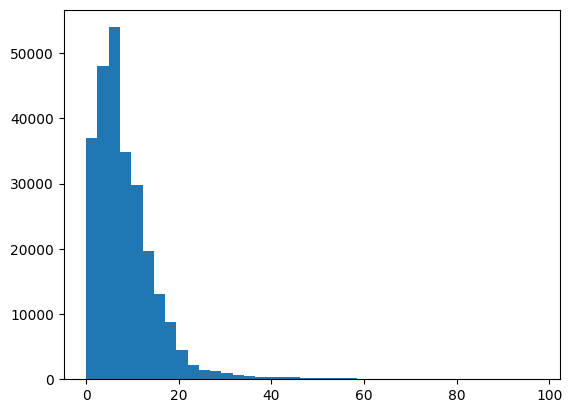

In [14]:
bins = 40
plt.hist(df['Energy (kWh)'],bins)

(array([3.6990e+04, 4.7972e+04, 5.3977e+04, 3.4905e+04, 2.9836e+04,
        1.9627e+04, 1.3074e+04, 8.7760e+03, 4.5040e+03, 2.1820e+03,
        1.4690e+03, 1.2310e+03, 1.0190e+03, 6.4900e+02, 5.1600e+02,
        4.1100e+02, 3.4700e+02, 3.1200e+02, 2.7400e+02, 2.3500e+02,
        1.9800e+02, 1.9300e+02, 1.8000e+02, 1.3700e+02, 1.1600e+02,
        7.4000e+01, 5.8000e+01, 5.7000e+01, 3.3000e+01, 1.1000e+01,
        1.7000e+01, 1.1000e+01, 1.1000e+01, 5.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([4.0000000e-03, 1.0261750e+00, 2.0483500e+00, 3.0705250e+00,
        4.0927000e+00, 5.1148750e+00, 6.1370500e+00, 7.1592250e+00,
        8.1814000e+00, 9.2035750e+00, 1.0225750e+01, 1.1247925e+01,
        1.2270100e+01, 1.3292275e+01, 1.4314450e+01, 1.5336625e+01,
        1.6358800e+01, 1.7380975e+01, 1.8403150e+01, 1.9425325e+01,
        2.0447500e+01, 2.1469675e+01, 2.2491850e+01, 2.3514025e+01,
        2.4536200e+01, 2.5558375e+01, 2.658055

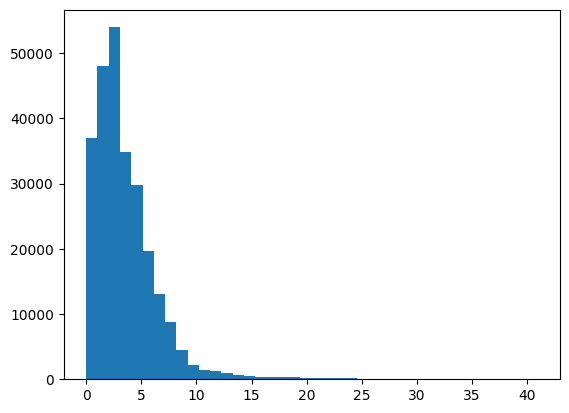

In [15]:
bins = 40
plt.hist(df['GHG Savings (kg)'],bins)

(array([3.6954e+04, 4.7912e+04, 5.4073e+04, 3.4853e+04, 2.9909e+04,
        1.9575e+04, 1.3110e+04, 8.7650e+03, 4.5110e+03, 2.1810e+03,
        1.4680e+03, 1.2320e+03, 1.0190e+03, 6.5100e+02, 5.1400e+02,
        4.1400e+02, 3.4400e+02, 3.1200e+02, 2.7400e+02, 2.3500e+02,
        1.9800e+02, 1.9300e+02, 1.8000e+02, 1.3700e+02, 1.1600e+02,
        7.4000e+01, 5.8000e+01, 5.7000e+01, 3.3000e+01, 1.1000e+01,
        1.7000e+01, 1.1000e+01, 1.1000e+01, 5.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.000000e-03, 3.064500e-01, 6.119000e-01, 9.173500e-01,
        1.222800e+00, 1.528250e+00, 1.833700e+00, 2.139150e+00,
        2.444600e+00, 2.750050e+00, 3.055500e+00, 3.360950e+00,
        3.666400e+00, 3.971850e+00, 4.277300e+00, 4.582750e+00,
        4.888200e+00, 5.193650e+00, 5.499100e+00, 5.804550e+00,
        6.110000e+00, 6.415450e+00, 6.720900e+00, 7.026350e+00,
        7.331800e+00, 7.637250e+00, 7.942700e+00, 8.248150e+00,
      

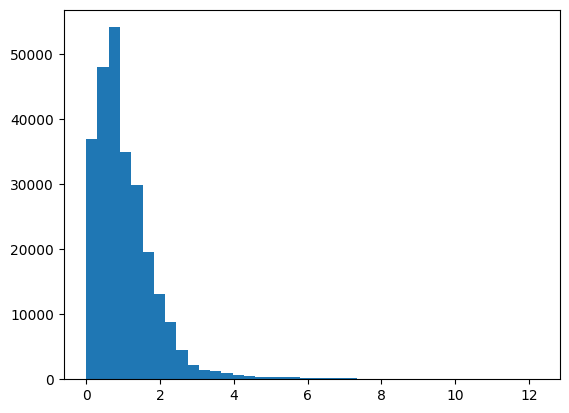

In [16]:
bins = 40
plt.hist(df['Gasoline Savings (gallons)'],bins)

(array([1.80026e+05, 6.57990e+04, 6.38800e+03, 4.03300e+03, 2.20300e+03,
        6.46000e+02, 2.05000e+02, 7.70000e+01, 2.00000e+01, 5.00000e+00,
        1.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([1.66666667e-02, 2.87972917e+00, 5.74279167e+00, 8.60585417e+00,
        1.14689167e+01, 1.43319792e+01, 1.71950417e+01, 2.00581042e+01,
        2.29211667e+01, 2.57842292e+01, 2.86472917e+01, 3.15103542e+01,
        3.43734167e+01, 3.72364792e+01, 4.00995417e+01, 4.29626042e+01,
        4.58256667e+01, 4.86887292e+01, 5.15517917e+01, 5.44148542e+01,
        5.72779167e+01, 6.01409792e+01, 6.30040417e+01

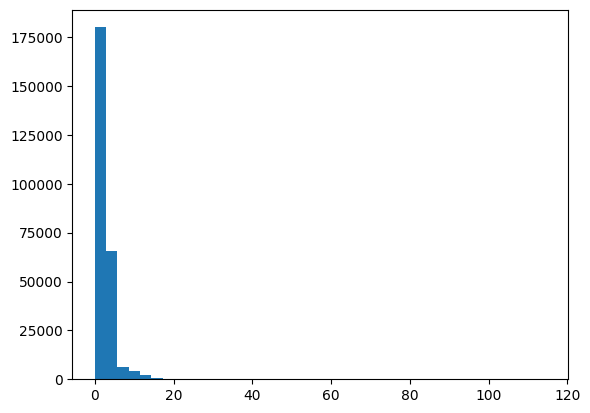

In [17]:
bins = 40
plt.hist(df['Total Duration (hours)'],bins)

(array([3.0600e+04, 4.3442e+04, 4.8744e+04, 4.7264e+04, 3.3556e+04,
        2.5330e+04, 1.4337e+04, 6.7270e+03, 3.8120e+03, 1.6480e+03,
        8.7900e+02, 5.9700e+02, 4.7500e+02, 3.9100e+02, 3.6400e+02,
        3.0500e+02, 2.5200e+02, 1.8700e+02, 1.2000e+02, 1.0200e+02,
        7.6000e+01, 6.8000e+01, 3.7000e+01, 3.2000e+01, 2.0000e+01,
        1.4000e+01, 8.0000e+00, 4.0000e+00, 3.0000e+00, 5.0000e+00,
        5.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.66666667e-03, 5.74923611e-01, 1.14818056e+00, 1.72143750e+00,
        2.29469444e+00, 2.86795139e+00, 3.44120833e+00, 4.01446528e+00,
        4.58772222e+00, 5.16097917e+00, 5.73423611e+00, 6.30749306e+00,
        6.88075000e+00, 7.45400694e+00, 8.02726389e+00, 8.60052083e+00,
        9.17377778e+00, 9.74703472e+00, 1.03202917e+01, 1.08935486e+01,
        1.14668056e+01, 1.20400625e+01, 1.26133194e+01, 1.31865764e+01,
        1.37598333e+01

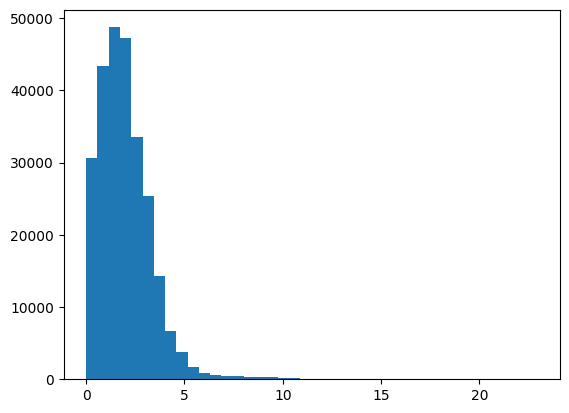

In [18]:
bins = 40
plt.hist(df['Charging (hours)'],bins)

{'whiskers': [<matplotlib.lines.Line2D at 0x25ca7461dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x25ca740cda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ca7ba0380>],
 'medians': [<matplotlib.lines.Line2D at 0x25ca740d310>],
 'fliers': [<matplotlib.lines.Line2D at 0x25ca740d520>],
 'means': []}

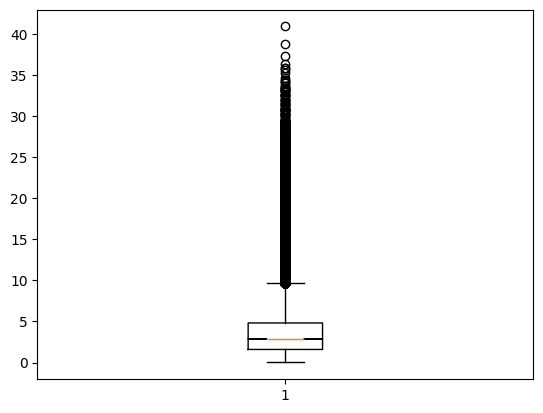

In [19]:
bins = 40
plt.boxplot(df['GHG Savings (kg)'], bins)

{'whiskers': [<matplotlib.lines.Line2D at 0x25ca73d3e00>,
 'caps': [<matplotlib.lines.Line2D at 0x25c9ace4290>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ca73d3b30>],
 'medians': [<matplotlib.lines.Line2D at 0x25c9ace47d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25c9ace4ad0>],
 'means': []}

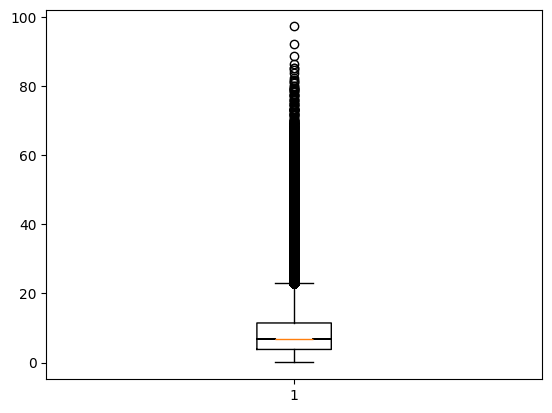

In [20]:
bins = 40
plt.boxplot(df['Energy (kWh)'],bins)

{'whiskers': [<matplotlib.lines.Line2D at 0x25c9ad2e000>,
 'caps': [<matplotlib.lines.Line2D at 0x25c9ad2e4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25c9ad2dd30>],
 'medians': [<matplotlib.lines.Line2D at 0x25c9ad2ea80>],
 'fliers': [<matplotlib.lines.Line2D at 0x25c9ad2ed80>],
 'means': []}

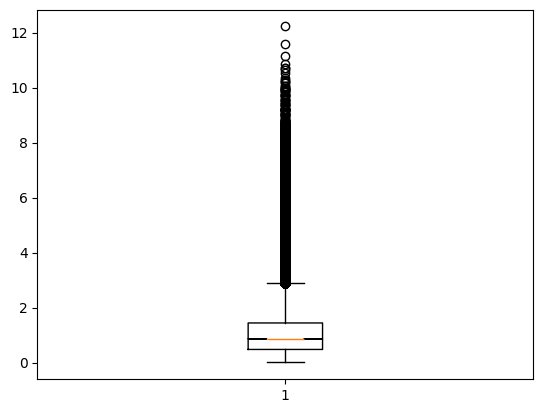

In [21]:
bins = 40
plt.boxplot(df['Gasoline Savings (gallons)'],bins)

{'whiskers': [<matplotlib.lines.Line2D at 0x25c9ad0ea50>,
 'caps': [<matplotlib.lines.Line2D at 0x25c9adac830>,
 'boxes': [<matplotlib.lines.Line2D at 0x25c9ad63920>],
 'medians': [<matplotlib.lines.Line2D at 0x25c9adacd10>],
 'fliers': [<matplotlib.lines.Line2D at 0x25c9adacfb0>],
 'means': []}

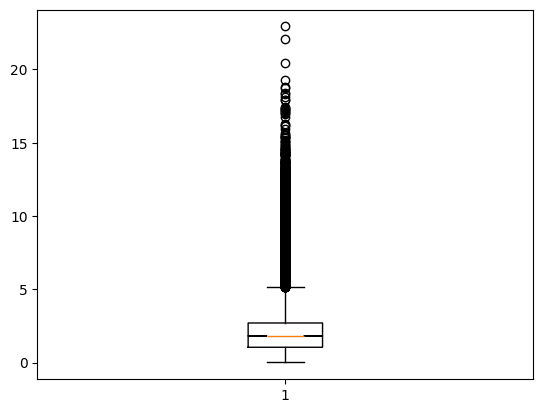

In [22]:
bins = 40
plt.boxplot(df['Charging (hours)'],bins)

{'whiskers': [<matplotlib.lines.Line2D at 0x25c9a4ace00>,
 'caps': [<matplotlib.lines.Line2D at 0x25c9af2e390>,
 'boxes': [<matplotlib.lines.Line2D at 0x25c9af2dca0>],
 'medians': [<matplotlib.lines.Line2D at 0x25c9af2e900>],
 'fliers': [<matplotlib.lines.Line2D at 0x25c9af2ec00>],
 'means': []}

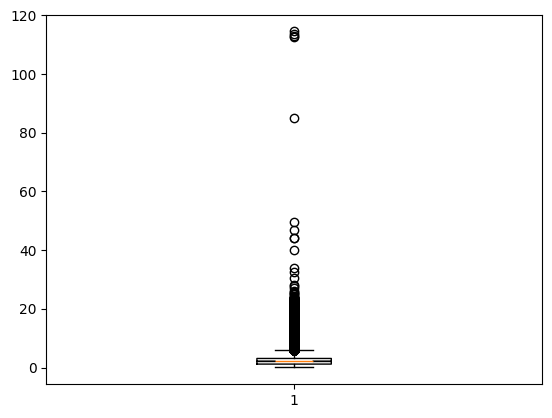

In [23]:
bins = 40
plt.boxplot(df['Total Duration (hours)'],bins)

## Multivariate analysis

### Identifying moments of peak traffic

In [37]:
df_energy = df.groupby('day_of_week')['Energy (kWh)'].apply(list).apply(pd.Series).T
df_energy

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,6.249457,5.041244,0.106588,17.171463,10.598673,3.516131,12.837713
1,12.238361,6.152762,14.951777,3.799148,2.003678,4.197217,4.620635
2,6.886972,5.255038,7.159643,16.238552,3.627027,8.497075,2.340949
3,3.956375,5.956442,1.957765,4.457012,8.740360,6.233372,3.013084
4,4.807265,0.737101,4.802880,8.940147,7.400985,2.832791,8.832448
...,...,...,...,...,...,...,...
40482,NaN,NaN,NaN,NaN,NaN,NaN,1.518000
40483,NaN,NaN,NaN,NaN,NaN,NaN,27.320000
40484,NaN,NaN,NaN,NaN,NaN,NaN,7.441000
40485,NaN,NaN,NaN,NaN,NaN,NaN,4.494000


In [62]:
energy_sum = pd.DataFrame(df_energy.sum())
energy_sum.rename(columns = {0:'Total energy (kWh)'},inplace = True)

energy_sum

,Total energy (kWh)
day_of_week,
Friday,345814.444439
Monday,331308.907984
Saturday,258812.722494
Sunday,239555.025739
Thursday,348695.627962
Tuesday,343038.196224
Wednesday,349288.679678


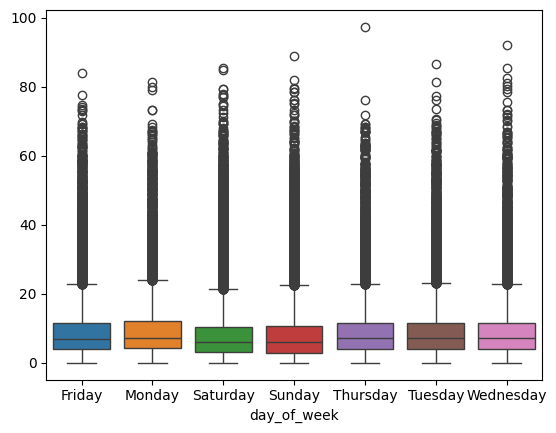

In [80]:
sns.boxplot(df_energy)
plt.show()

<Axes: xlabel='day_of_week', ylabel='Total energy (kWh)'>

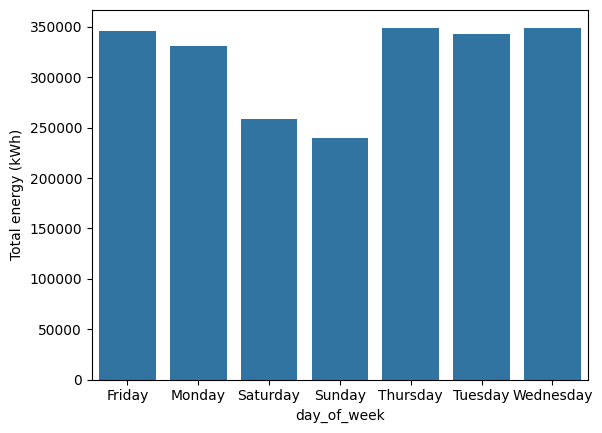

In [66]:
sns.barplot(energy_sum['Total energy (kWh)'])

In [70]:
df_duration = df.groupby('day_of_week')['Total Duration (hours)'].apply(list).apply(pd.Series).T
df_duration

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,3.058889,3.392778,0.035000,6.105278,3.673889,1.013889,3.681389
1,3.510000,3.484444,4.292222,1.165000,0.574722,1.211944,1.742222
2,2.268056,1.508611,2.056667,4.829444,1.595556,2.446111,0.812778
3,1.234167,1.723333,1.190000,18.315833,2.975833,2.251667,1.045833
4,1.648611,1.574722,3.870278,3.546667,2.471389,0.821944,9.985278
...,...,...,...,...,...,...,...
40482,NaN,NaN,NaN,NaN,NaN,NaN,0.258056
40483,NaN,NaN,NaN,NaN,NaN,NaN,4.526667
40484,NaN,NaN,NaN,NaN,NaN,NaN,2.653333
40485,NaN,NaN,NaN,NaN,NaN,NaN,0.765000


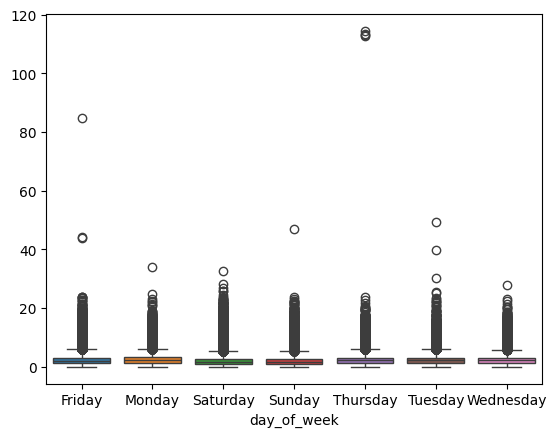

In [71]:
sns.boxplot(df_duration)
plt.show()

In [78]:
duration_sum = pd.DataFrame(df_duration.sum())
duration_sum.rename(columns = {0:'Total duration (hours)'},inplace = True)

duration_sum

,Total duration (hours)
day_of_week,
Friday,101243.029167
Monday,96771.948611
Saturday,73273.735556
Sunday,66398.700556
Thursday,102544.885000
Tuesday,101582.075278
Wednesday,103304.249444


<Axes: xlabel='day_of_week', ylabel='Total duration (hours)'>

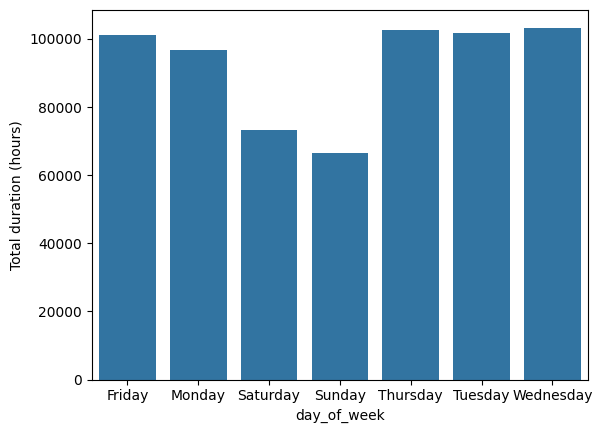

In [79]:
sns.barplot(duration_sum['Total duration (hours)'])